<a href="https://colab.research.google.com/github/Codersweta7/ml_project1/blob/main/Goldprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and Processing


In [ ]:
#loading the csv data to a pandas DataFrame
gold_data= pd.read_csv('/content/gold_price_data.csv')

In [ ]:
#print first five rows in the DataFRame
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last 5 rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and columns
gold_data.shape


(2290, 6)

In [ ]:
#getting information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking number of missing value
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#getting the stastical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation**

1.   Positive Correlation
2.   Negative Correlation




In [ ]:
gold_data=gold_data.drop('Date',axis=1)

In [ ]:
correlation=gold_data.corr()

<Axes: >

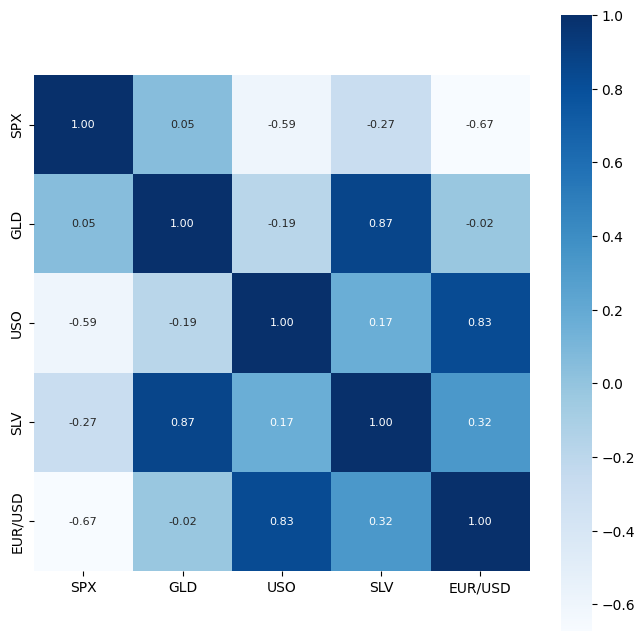

In [ ]:
#constructing heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
#correlation values of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


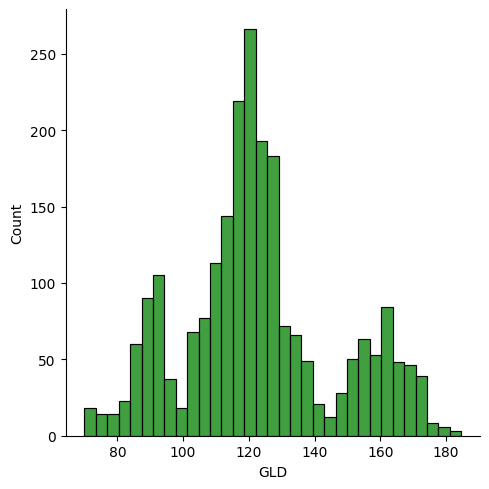

In [ ]:
#Checking distribution of the GLD price
sns.displot(gold_data['GLD'],color='green')

Splitting the feature and the Target


In [ ]:
x=gold_data.drop(['GLD'],axis=1)
y=gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data


In [ ]:
x_train, x_test,  y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model Training **Random forest Regressor**

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
#prediction on Test Data
test_data_prediction=regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.59319904  82.0245999  116.33780023 127.65460046 120.66520141
 154.69209761 150.78799843 126.04360013 117.47139881 125.96410085
 116.72950131 172.20460051 141.05149926 167.83179897 115.14350015
 117.39540032 136.43800369 169.94400074 159.57040347 158.595499
 154.96470008 125.02220011 176.25899989 157.06150392 125.25830034
  93.66579951  77.77480012 120.57170028 119.05349873 167.51190017
  88.30460068 125.19380012  91.01190074 117.68829996 121.08959849
 136.00580067 115.43450121 115.82340081 148.55410023 107.34180092
 104.53950269  87.28879798 126.41980062 117.76390019 152.90409912
 119.6488001  108.35709952 108.25389794  93.24340026 127.08819791
  75.61040021 113.67509897 121.43400029 111.16929959 118.8243989
 120.48379957 159.45830025 167.00980177 146.85889643  85.73599826
  94.20090027  86.79169873  90.56130027 119.04800081 126.38050086
 127.72770017 169.98359953 122.31399943 117.63419896  98.54540081
 168.3582015  143.08419791 132.29810258 121.39130203 121.19119933
 119.74610042

In [ ]:
# R sqaured error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error",error_score)

R squared error 0.9891855811115786


Compare Actual value and Predicted values in plot

In [ ]:
y_test=list(y_test)

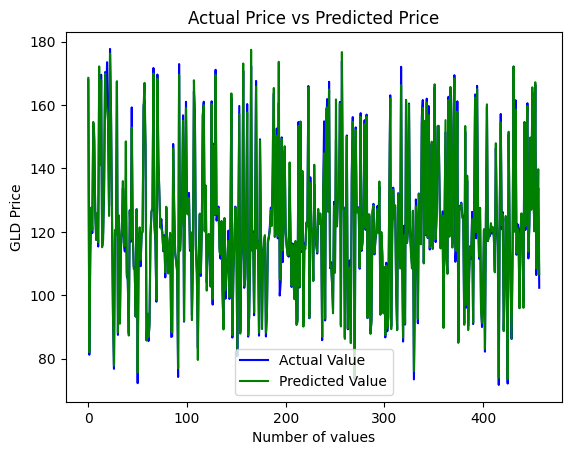

In [ ]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()